In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
os.listdir()

['True_1.pkl',
 '.DS_Store',
 'plotQ2.ipynb',
 'False_0.2.pkl',
 'normal.pkl',
 'False_1.pkl']

In [4]:
file = ["normal.pkl","True_1.pkl","False_1.pkl"]
label = ["Double Q","Single Q w/ tuning", "Single Q w/o tuning"]
data = []
for name in file:
    with open(name,"rb") as f:
        d = pickle.load(f)
        data.append(d)

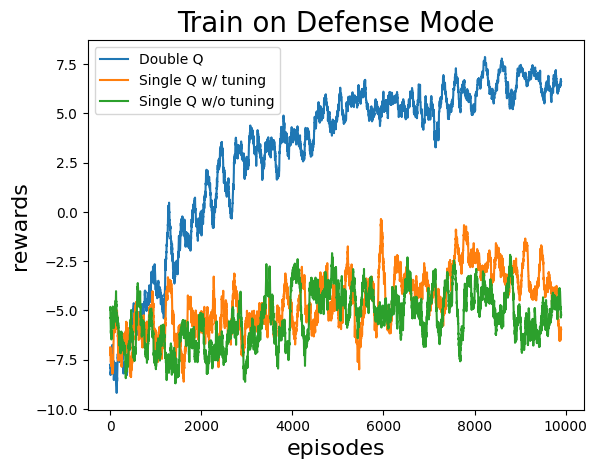

In [5]:
for i,d in enumerate(data):
    plt.plot(running_mean(d["rewards"],100),label=label[i])
plt.legend()
plt.title("Train on Defense Mode",fontsize=20)

plt.xlabel("episodes",fontsize=16)
plt.ylabel("rewards",fontsize=16)
plt.legend()

In [6]:
def win_rate(r):
    N = len(r)
    
    rate = np.zeros(N)
    for i, rr in enumerate(r):
        if i < 1000 :
            mask = np.sum(r[:i+1] > 0)
            rate[i] = mask / (i+1)
        else:
            mask = np.sum( r[i-999:i+1] > 0)
            rate[i] = mask / (1000.)
    return rate


In [12]:

def win_rate(num):
    return 1 - (0.95 - num/10)/2
win_rate(8)

0.925

final rate= 0.8598417485785349
final rate= 0.2814702884624949
final rate= 0.27874451925821087


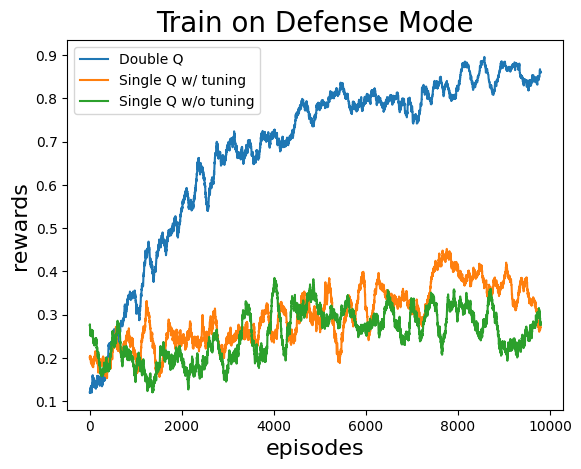

In [16]:
for i,d in enumerate(data):
    
    r = running_mean(d["rewards"],200)
    rate = win_rate(r)
    print("final rate=",rate[-1])
    plt.plot(rate,label=label[i])
    #plt.plot(running_mean(d["rewards"],100),label=label[i])
plt.legend()
plt.title("Train on Defense Mode",fontsize=20)

plt.xlabel("episodes",fontsize=16)
plt.ylabel("rewards",fontsize=16)
plt.legend()